In [446]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [447]:
data = pd.read_csv('bureau.csv')
data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [448]:
data.shape

(1716428, 17)

In [449]:
app_train = pd.read_csv("application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [450]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


# Understanding of variables

CREDIT_ACTIVE - Current status of a Loan - Closed/ Active (2 values) 

CREDIT_CURRENCY - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)

CREDIT_DAY_OVERDUE - Number of overdue days

CREDIT_TYPE - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )

DAYS_CREDIT - How many days before current application did client apply for Credit Bureau credit

DAYS_CREDIT_ENDDATE - Remaining duration of CB credit (in days) at the time of application in Home Credit

CREDIT_DAY_OVERDUE - Number of days past due on CB credit at the time of application for related loan in our sample

AMT_CREDIT_SUM - Total available credit for a customer 

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed 

AMT_CREDIT_SUM_LIMIT - Current Credit that has been utilized 

AMT_CREDIT_SUM_OVERDUE - Current credit payment that is overdue 

CNT_CREDIT_PROLONG - How many times was the Credit date prolonged

# NOTE:
For a given loan transaction 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT'

AMT_ANNUITY - Annuity of the Credit Bureau data 

DAYS_CREDIT_UPDATE - Number of days before current application when last CREDIT UPDATE was received 

DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application 

AMT_CREDIT_MAX_OVERDUE - Maximum Credit amount overdue at the time of application

In [451]:
data.duplicated().sum()

0

In [452]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,188866.75,278055.0,367426.00,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5463953.75,5926303.5,6385681.25,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-1666.00,-987.0,-474.00,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-1138.00,-330.0,474.00,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-1489.00,-897.0,-425.00,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000,0.00,0.0,0.00,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,51300.00,125518.5,315000.00,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,40153.50,1.701000e+08


<ipython-input-453-0f017e91119c>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_df_corr, dtype=np.bool)


<AxesSubplot:>

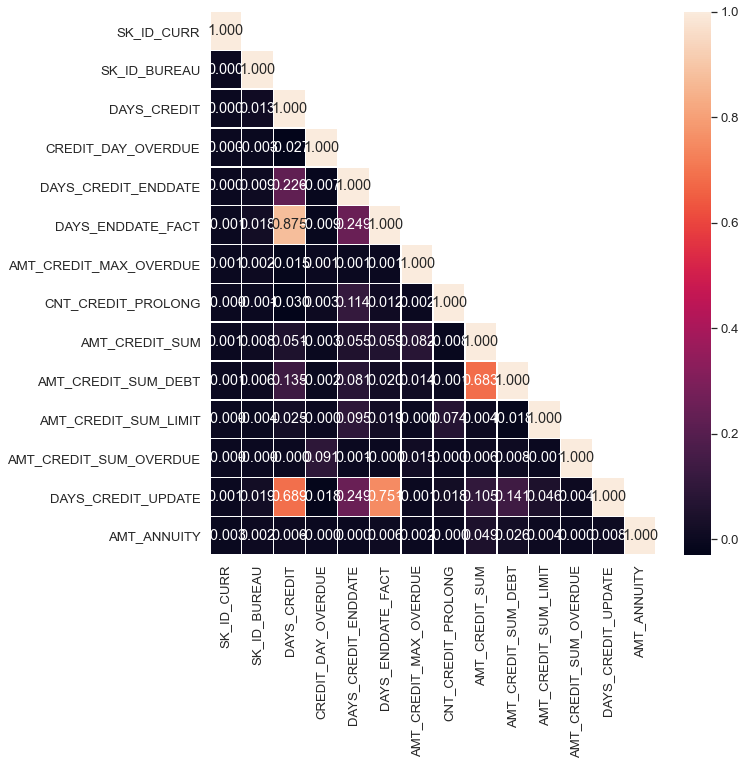

In [453]:
numeric_df = data._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [454]:
data.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

### Những biến liên quan tới ngày, ta có thể thấy rằng có 1 số quan sát có giá trị lên đến 365243.0, nếu như mà đổi ra năm thì sẽ tương đương với việc hơn 1000 năm. Điều này trong thực tế là rất vô lý và không có ý nghĩa. Ngoài ra cũng có rất nhiều các khoản nợ có ngày kết thúc trước đó rất nhiều ngày. Nên ở đây chúng ta chỉ giữ những quan sát có giá trị quy đổi ra nhỏ hơn 50 năm kể từ thời điểm có khoản vay ở Home Credit

In [455]:
data['DAYS_CREDIT_ENDDATE'][data['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
data['DAYS_ENDDATE_FACT'][data['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
data['DAYS_CREDIT_UPDATE'][data['DAYS_CREDIT_UPDATE'] > -50*365] = np.nan

<ipython-input-455-3a1cc7c5f3a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAYS_CREDIT_ENDDATE'][data['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
<ipython-input-455-3a1cc7c5f3a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAYS_ENDDATE_FACT'][data['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
<ipython-input-455-3a1cc7c5f3a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAYS_CREDIT_UPDATE'][data['DAYS_CREDIT_

In [456]:
data.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE       1716294
DAYS_ENDDATE_FACT         1716427
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE        1716333
AMT_ANNUITY               1226791
dtype: int64

In [457]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [458]:
missing_data(data)

,Total,Percent
DAYS_ENDDATE_FACT,1716427,99.999942
DAYS_CREDIT_UPDATE,1716333,99.994465
DAYS_CREDIT_ENDDATE,1716294,99.992193
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
AMT_CREDIT_SUM,13,0.000757
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT,0,0.000000


### DROP AMT_ANNUITY columns do là phần trăm >60% cùng với đó ANNUITY là trái phiếu đồng niên k liên quan gì đến các khoản tín dụng/nợ

In [459]:
data = data.drop(columns=['AMT_ANNUITY'])
data.shape

(1716428, 16)

### Sau khi cleaning những giá trị vô nghĩa ở những biến liên quan đến ngày thì ta có thể thấy 3 biến "DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE" có phần trăm null gần như là 100% cùng với đó kể từ trc khi cleaning nhìn vào biểu đồ heatmap correlation t cũng có thể thấy corr của những biến này với nhau là rất cao. Ta có thể DROP ba biến này 

In [460]:
data = data.drop(columns=["DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE"])
data.shape

(1716428, 13)

In [461]:
# data['DAYS_ENDDATE_FACT'].fillna(value = data['DAYS_ENDDATE_FACT'].mean(), inplace= True)
# data['DAYS_CREDIT_ENDDATE'].fillna(value=data['DAYS_CREDIT_ENDDATE'].mean(), inplace = True)

data['AMT_CREDIT_SUM_DEBT']=data['AMT_CREDIT_SUM_DEBT'].fillna(0)
data['AMT_CREDIT_SUM']=data['AMT_CREDIT_SUM'].fillna(0)

In [462]:
missing_data(data)

,Total,Percent
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
AMT_CREDIT_SUM_LIMIT,591780,34.477415
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,0,0.000000


# $\color{red}{\text{EDA}}$

### MERGE with TARGET columns in application_train.csv to get more insights 

In [463]:
data_merged = pd.merge(app_train[["SK_ID_CURR", "TARGET"]], data, how='left', on=['SK_ID_CURR'])
data_merged.head(10)

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE
0,100002,1,6158904.0,Closed,currency 1,-1125.0,0.0,NaN,0.0,40761.000,0.0,NaN,0.0,Credit card
1,100002,1,6158905.0,Closed,currency 1,-476.0,0.0,NaN,0.0,0.000,0.0,NaN,0.0,Credit card
2,100002,1,6158906.0,Closed,currency 1,-1437.0,0.0,0.000,0.0,135000.000,0.0,0.000,0.0,Consumer credit
3,100002,1,6158907.0,Closed,currency 1,-1121.0,0.0,3321.000,0.0,19071.000,0.0,NaN,0.0,Consumer credit
4,100002,1,6158908.0,Closed,currency 1,-645.0,0.0,5043.645,0.0,120735.000,0.0,0.000,0.0,Consumer credit
5,100002,1,6158909.0,Active,currency 1,-103.0,0.0,40.500,0.0,31988.565,0.0,31988.565,0.0,Credit card
6,100002,1,6158903.0,Active,currency 1,-1042.0,0.0,NaN,0.0,450000.000,245781.0,0.000,0.0,Consumer credit
7,100002,1,6113835.0,Closed,currency 1,-1043.0,0.0,0.000,0.0,67500.000,0.0,NaN,0.0,Credit card
8,100003,0,5885877.0,Closed,currency 1,-2586.0,0.0,0.000,0.0,22248.000,0.0,0.000,0.0,Consumer credit
9,100003,0,5885878.0,Closed,currency 1,-1636.0,0.0,0.000,0.0,112500.000,0.0,0.000,0.0,Credit card


In [464]:
data_merged.shape

(1509345, 14)



# $\color{red}{\text{Các biến catergories}}$ 

In [465]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    '''
    Function to plot Categorical Variables Bar Plots
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

Total Number of unique categories of CREDIT_ACTIVE = 5


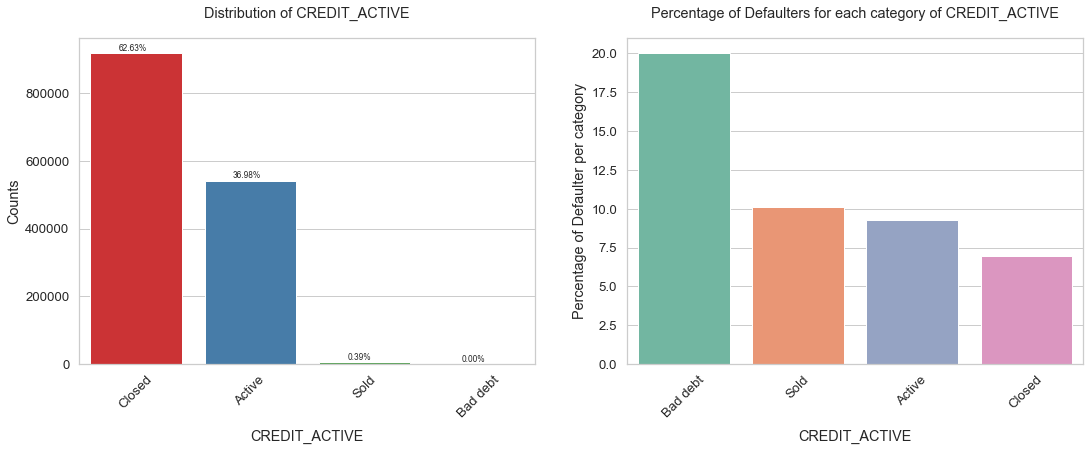

In [466]:
plot_categorical_variables_bar(data_merged,'CREDIT_ACTIVE',rotation=45, horizontal_adjust=0.25 )

### Trạng thái của các khoản tín dụng Bureau là 62.9% là Closed, 36.7% là Active, 0.4% là đã được bán, <0.1% là nợ xấu 

In [467]:
# grp_credit_active = data['CREDIT_ACTIVE'].value_counts().reset_index()
# grp_credit_active.columns = ['status', 'amt']
# # grp_credit_active

# fig, ax = plt.subplots(figsize =(4.5,6))
# ax.barh(grp_credit_active.status, grp_credit_active.amt,height=0.8)

# lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
# for i in lst:
#     ax.spines[i].set_visible(False)
    
# ax.xaxis.tick_top()
# ax.tick_params(left= False, top= False)
# ax.invert_yaxis()

Total Number of unique categories of CREDIT_CURRENCY = 5


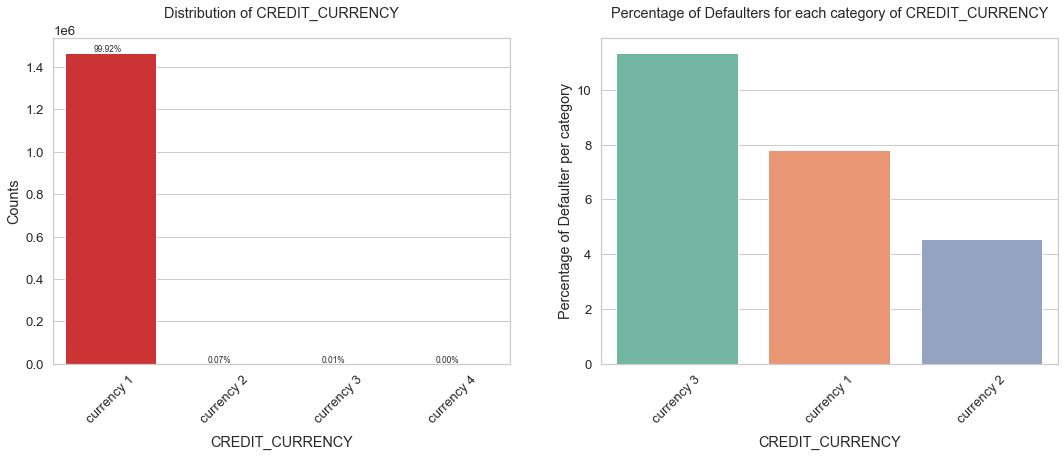

In [468]:
plot_categorical_variables_bar(data_merged,'CREDIT_CURRENCY',rotation=45, horizontal_adjust=0.25 )

### Trong 4 loại tiền tệ, từ currency 1 đến currency 4 thì 99.9%  là loại 1 

In [469]:
# grp_credit_currency = data['CREDIT_CURRENCY'].value_counts().reset_index()
# grp_credit_currency.columns = ['type_of_currency', 'amt']
# # grp_credit_currency

# fig, ax = plt.subplots(figsize =(4.5,6))
# ax.barh(grp_credit_currency.type_of_currency, grp_credit_currency.amt,height=0.8)

# lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
# for i in lst:
#     ax.spines[i].set_visible(False)
    
# ax.xaxis.tick_top()
# ax.tick_params(left= False, top= False)
# ax.invert_yaxis()

Total Number of unique categories of CREDIT_TYPE = 16


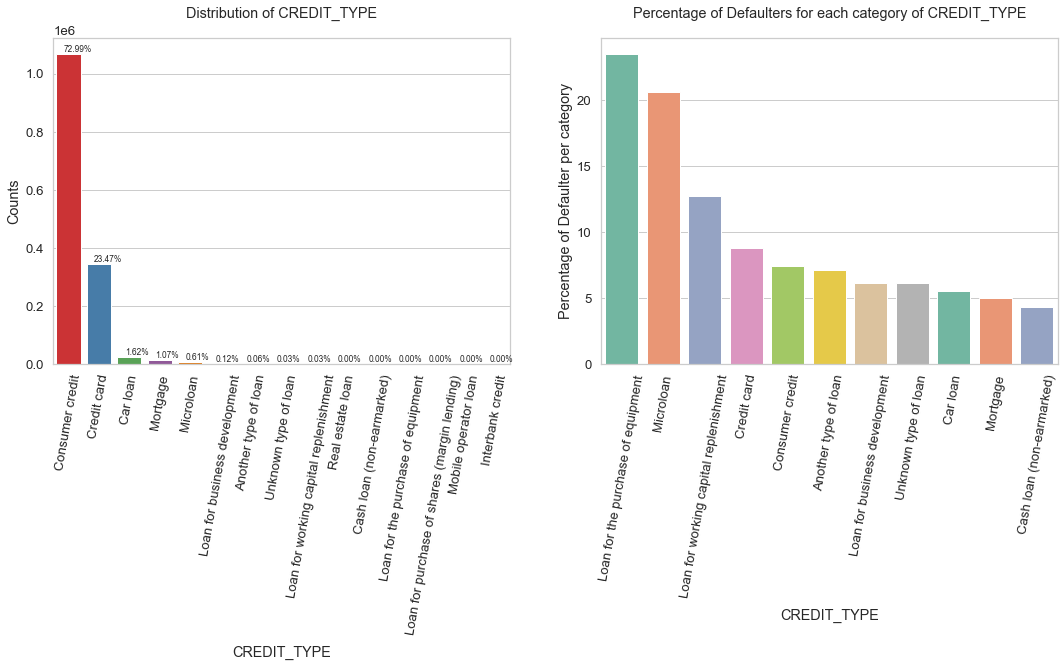

In [470]:
plot_categorical_variables_bar(data_merged,'CREDIT_TYPE',rotation=80, horizontal_adjust=0.25 )

### Có tổng cộng 15 loại tín dụng, 72.9% là tín dụng tiêu dùng, 23.4% là thẻ tín dụng 

In [471]:
# grp_credit_type = data['CREDIT_TYPE'].value_counts().reset_index()
# grp_credit_type.columns = ['type_of_credit', 'amt']
# # grp_credit_type

# fig, ax = plt.subplots(figsize =(4.5,6))
# ax.barh(grp_credit_type.type_of_credit, grp_credit_type.amt, height=0.8)

# lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
# for i in lst:
#     ax.spines[i].set_visible(False)
    
# ax.set_xticks([0,400000,800000,1200000,1700000])
# ax.xaxis.tick_top()
# ax.tick_params(left= False, top= False)
# ax.invert_yaxis()

### PROFILE REPORT 

In [472]:
# report = ProfileReport(data[['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']], minimal=True)
# report.to_notebook_iframe()
# report.to_file("report.html", silent=False)

# $\color{red}{\text{Các biến Numerical}}$

In [473]:
def draw_distribution_dist(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(10,5))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [474]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'CDF', 'box', 'violin'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
    '''
    Function to plot continuous variables distribution
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        histogram: bool, default = True
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''
    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        
#         if ele == 'CDF':
#             #making the percentile DataFrame for both positive and negative Class Labels
#             percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
#             percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
#             percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
#             percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
#             plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
#             plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
#             plt.xlabel(column_name)
#             plt.ylabel('Probability')
#             plt.title('CDF of {}'.format(column_name))
#             plt.legend(fontsize = 'medium')
#             if log_scale:
#                 plt.xscale('log')
#                 plt.xlabel(column_name + ' - (log-scale)')
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

#         if ele == 'violin':  
#             sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
#             plt.title("Violin-Plot of {}".format(column_name))
#             if log_scale:
#                 plt.yscale('log')
#                 plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

In [475]:
data_merged['YEARS_CREDIT'] = abs(data_merged['DAYS_CREDIT'] / 365)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


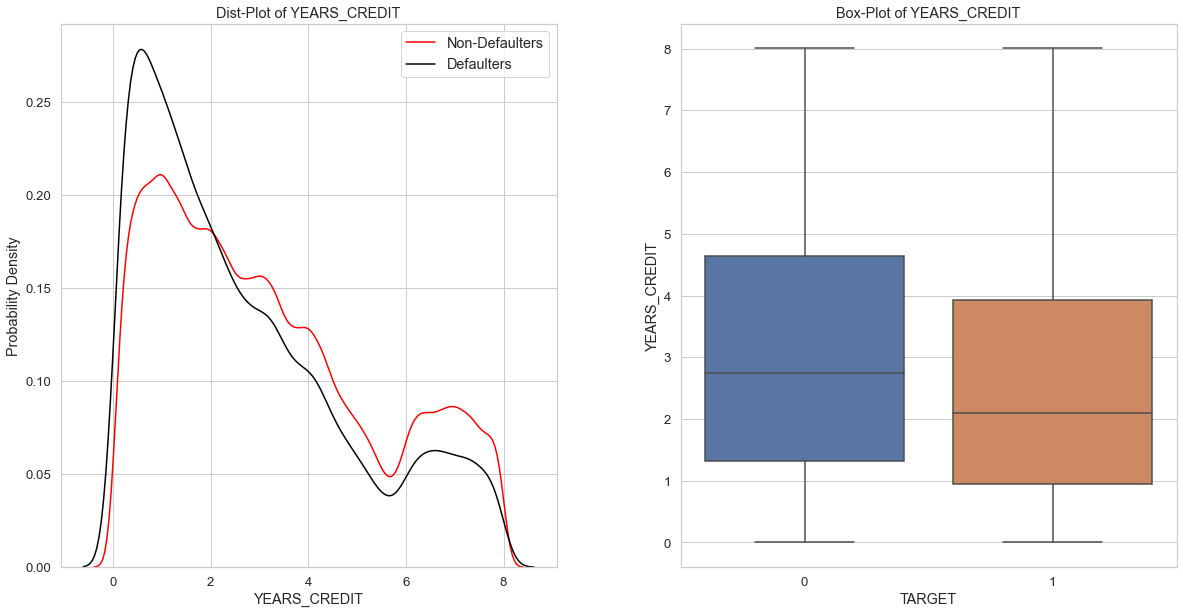

In [476]:
plot_continuous_variables(data_merged,'YEARS_CREDIT', plots = ['distplot','box'],figsize=(20,10))

### From this plot, we observe that the Non-Defaulters usually have longer periods of Credits as compared to Defaulters. This can be visualized both from the Box-Plot and the PDF. The Defaulters have a higher Peak in PDF in lower YEARS_CREDIT range of values.

In [477]:
# draw_distribution_dist(data["DAYS_CREDIT"],'Distribution of Day credit',"g")

In [478]:
(data_merged['CREDIT_DAY_OVERDUE']==0).sum()

1461619

# $\color{red}{\text{Number of past loans per customer}}$

In [479]:
num_past_loan_target = data_merged[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target

,SK_ID_CURR,TARGET,num_of_past_loans
0,100002,1,8
1,100003,0,4
2,100004,0,2
3,100006,0,0
4,100007,0,1
...,...,...,...
307506,456251,0,0
307507,456252,0,0
307508,456253,0,4
307509,456254,1,1


[Text(0.5, 1.0, 'defaulter')]

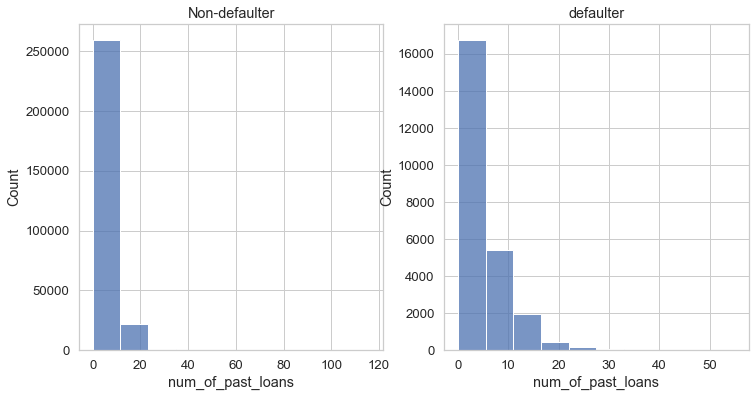

In [480]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(num_past_loan_target[num_past_loan_target["TARGET"] == 0]["num_of_past_loans"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(num_past_loan_target[num_past_loan_target["TARGET"] == 1]["num_of_past_loans"], ax= ax[1], bins=10).set(title = "defaulter")

In [481]:
# plot_continuous_variables(num_past_loan_target,"num_of_past_loans", plots = ['distplot'],figsize=(20,10))

### Những người gặp khó khăn trong việc trả nợ là do có số lượng các khoản tín dụng nhiều 

In [482]:
num_past_loan = data[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index()
num_past_loan.columns = ['SK_ID_CURR','PAST_LOAN_COUNT']
num_past_loan

,SK_ID_CURR,PAST_LOAN_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


In [483]:
# plt.figure(figsize=(8,6))
# sns.distplot(num_past_loan.PAST_LOAN_COUNT)
# plt.show()



# $\color{red}{\text{Number of types of past loans per customer}}$

In [484]:
num_of_type_target = data_merged[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target

,SK_ID_CURR,TARGET,num_of_credit_type
0,100002,1,2
1,100003,0,2
2,100004,0,1
3,100006,0,0
4,100007,0,1
...,...,...,...
307506,456251,0,0
307507,456252,0,0
307508,456253,0,2
307509,456254,1,1


### VÍ DỤ:  Trong 8 cái past loan của 100002 thì sẽ có 2 loại 



[Text(0.5, 1.0, 'defaulter')]

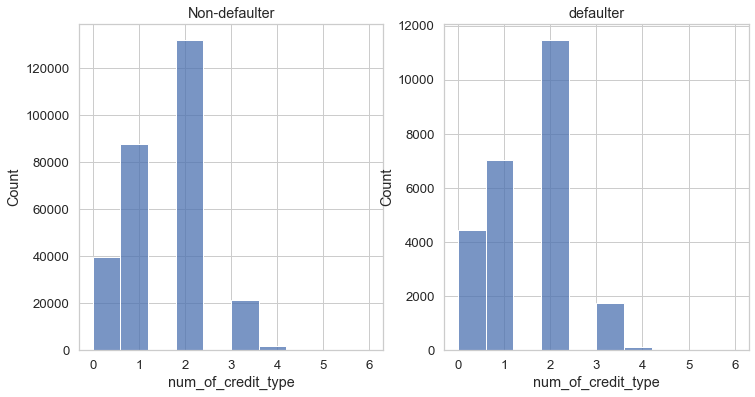

In [485]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(num_of_type_target[num_of_type_target["TARGET"] == 0]["num_of_credit_type"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(num_of_type_target[num_of_type_target["TARGET"] == 1]["num_of_credit_type"], ax= ax[1], bins=10).set(title = "defaulter")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


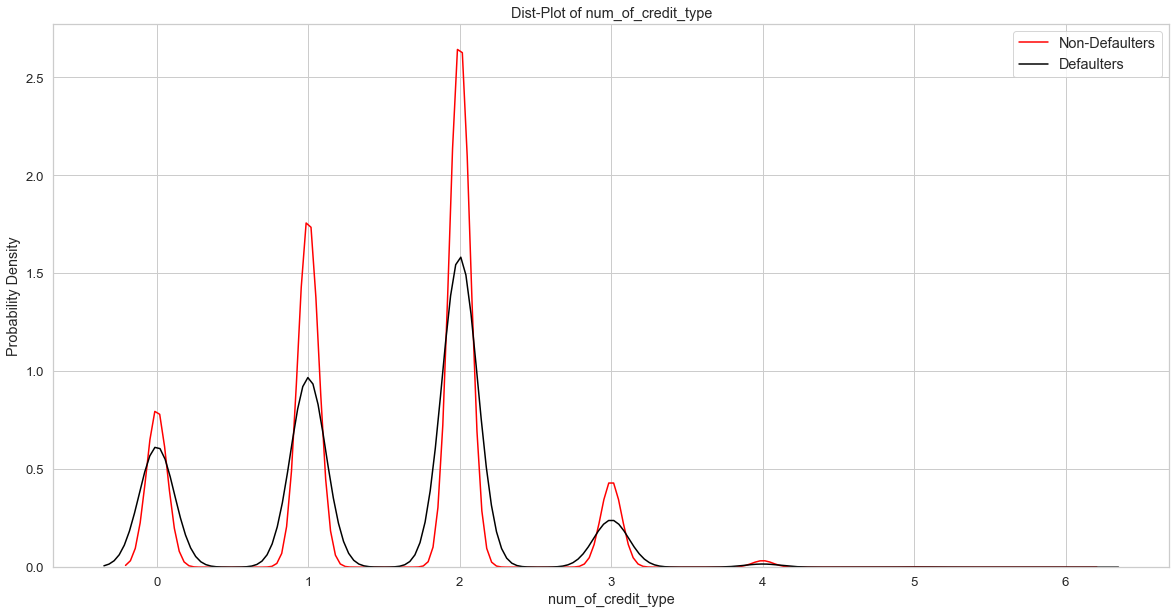

In [486]:
plot_continuous_variables(num_of_type_target,"num_of_credit_type", plots = ['distplot'],figsize=(20,10))

### Phân bố khá giống nhau, có vẻ yếu tố number of credit type không ảnh hưởng đến việc khách hàng có gặp khó khăn trong việc trả nợ hay không 

In [487]:
num_of_type = data[['SK_ID_CURR','CREDIT_TYPE']].groupby(['SK_ID_CURR']).nunique().reset_index()
num_of_type.columns = ['SK_ID_CURR','CREDIT_TYPE_COUNT']
num_of_type

,SK_ID_CURR,CREDIT_TYPE_COUNT
0,100001,1
1,100002,2
2,100003,2
3,100004,1
4,100005,2
...,...,...
305806,456249,3
305807,456250,2
305808,456253,2
305809,456254,1


In [488]:
# plt.figure(figsize=(8,6))
# sns.histplot(grp_num_of_type.num_of_credit_type)
# plt.show()

### Nhìn chung phần lớn khách hàng sẽ có 2 loại loans trc khi apply for credit bureau credit 

# $\color{red}{\text{The percentage of active loans per customer }}$

In [489]:
data_merged['CREDIT_ACTIVE_BINARY'] = data_merged['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data_merged['CREDIT_ACTIVE_BINARY'] = data_merged.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans_target = data_merged.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,100002,1,0.250000
1,100003,0,0.250000
2,100004,0,0.000000
3,100006,0,1.000000
4,100007,0,0.000000
...,...,...,...
307506,456251,0,1.000000
307507,456252,0,1.000000
307508,456253,0,0.500000
307509,456254,1,0.000000


[Text(0.5, 1.0, 'Defaulter')]

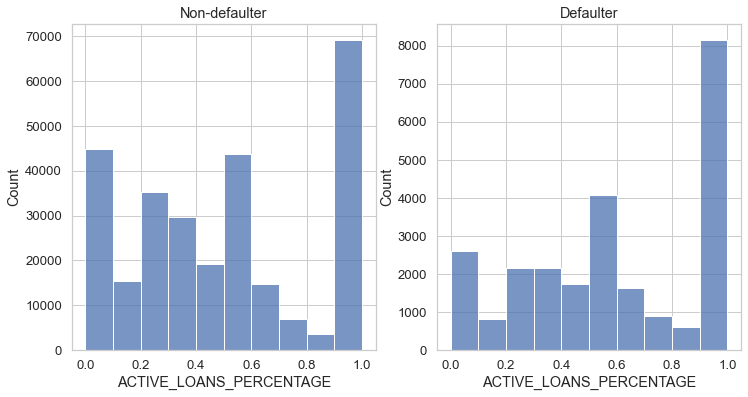

In [490]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(atv_loans_target[atv_loans_target["TARGET"] == 0]["ACTIVE_LOANS_PERCENTAGE"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(atv_loans_target[atv_loans_target["TARGET"] == 1]["ACTIVE_LOANS_PERCENTAGE"], ax= ax[1], bins=10).set(title = "Defaulter")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


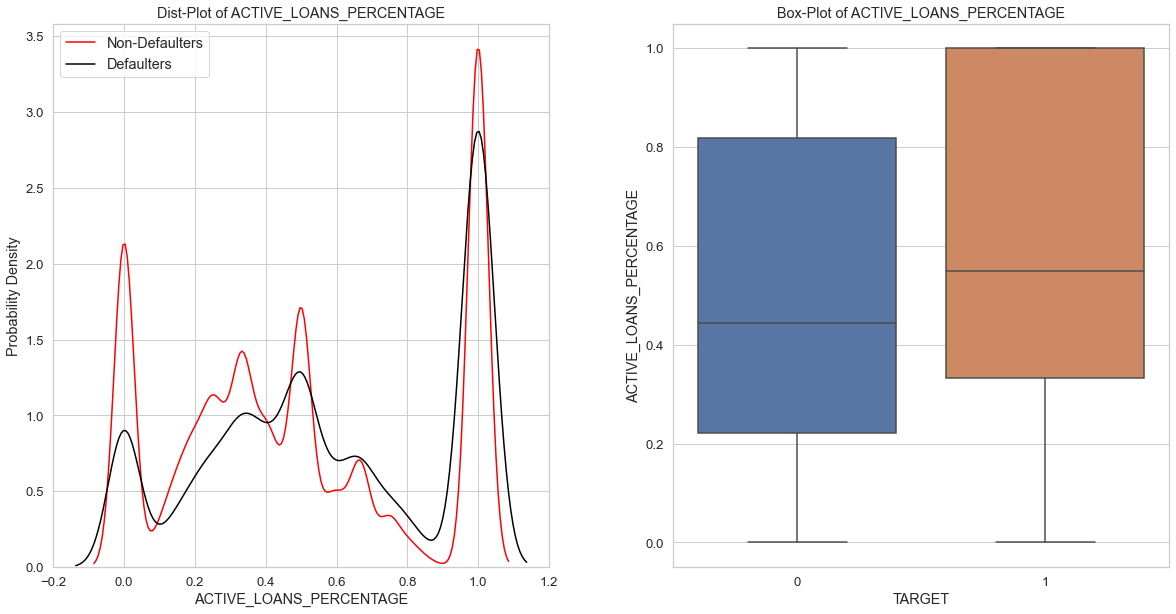

In [491]:
plot_continuous_variables(atv_loans_target,"ACTIVE_LOANS_PERCENTAGE", plots = ['distplot','box'],figsize=(20,10))

### Khác nhau ở mức 20-50%


In [492]:
data['CREDIT_ACTIVE_BINARY'] = data['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data['CREDIT_ACTIVE_BINARY'] = data.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans = data.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans['ACTIVE_LOANS_PERCENTAGE'] = atv_loans['ACTIVE_LOANS_PERCENTAGE'] * 100
data = data.drop(columns=['CREDIT_ACTIVE_BINARY'])
atv_loans


,SK_ID_CURR,ACTIVE_LOANS_PERCENTAGE
0,100001,42.857143
1,100002,25.000000
2,100003,25.000000
3,100004,0.000000
4,100005,66.666667
...,...,...
305806,456249,15.384615
305807,456250,66.666667
305808,456253,50.000000
305809,456254,0.000000


In [493]:
# plt.figure(figsize=(8,6))
# sns.displot(atv_loans.ACTIVE_LOANS_PERCENTAGE)
# plt.show()

### Ví dụ thằng 100002 có 8 cái past loan và trong đó có 2 cái active

### => active loan percentage của 100002 sẽ ~ 25%

# $\color{red}{\text{The percentage of loans per customer where end date for credit is past}}$

INTERPRETING CREDIT_DAYS_ENDDATE

NEGATIVE VALUE - Credit date was in the past at time of application( Potential Red Flag !!! )

POSITIVE VALUE - Credit date is in the future at time of application ( Potential Good Sign !!!!)

NOTE : This is not the same as % of Active loans since Active loans

can have Negative and Positive values for DAYS_CREDIT_ENDDATE

In [494]:
# data_merged['CREDIT_ENDDATE_BINARY'] = data_merged['DAYS_CREDIT_ENDDATE']

# def f(x):
#     if x<0:
#         y = 0
#     else:
#         y = 1   
#     return y

# data_merged['CREDIT_ENDDATE_BINARY'] = data_merged.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)

# grp_enddate_target = data_merged.groupby(by = ['SK_ID_CURR','TARGET'])['CREDIT_ENDDATE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'CREDIT_ENDDATE_PERCENTAGE'})
# grp_enddate_target


In [495]:
# fig, ax = plt.subplots(1,2, figsize= (12,6))
# sns.histplot(grp_enddate_target[grp_enddate_target["TARGET"] == 0]["CREDIT_ENDDATE_PERCENTAGE"], ax= ax[0], bins=10).set(title = "Non-defaulter")
# sns.histplot(grp_enddate_target[grp_enddate_target["TARGET"] == 1]["CREDIT_ENDDATE_PERCENTAGE"], ax= ax[1], bins=10).set(title = "Defaulter")

### 62.5% các khoản vay của th 100002 kết thúc trong tương lai sau khi có 1 cái application ở Home Credit

### => khach hang 100002 có 1 cái potential good sign, vì sau khi có khoản loan ở home credit rồi vẫn trả được cái khoản cũ 

In [496]:
# data['CREDIT_ENDDATE_BINARY'] = data['DAYS_CREDIT_ENDDATE']

# def f(x):
#     if x<0:
#         y = 0
#     else:
#         y = 1   
#     return y

# data['CREDIT_ENDDATE_BINARY'] = data.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)

# grp_enddate = data.groupby(by = ['SK_ID_CURR'])['CREDIT_ENDDATE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'CREDIT_ENDDATE_PERCENTAGE'})
# grp_enddate['CREDIT_ENDDATE_PERCENTAGE'] = grp_enddate['CREDIT_ENDDATE_PERCENTAGE'] * 100
# grp_enddate
# data = data.drop(columns=['CREDIT_ENDDATE_BINARY'])

In [497]:
# plt.figure(figsize=(8,6))
# sns.displot(grp_enddate.CREDIT_ENDDATE_PERCENTAGE)
# plt.show()

# $\color{red}{\text{The Ratio of Total Debt to Total Credit for each Customer}}$

In [498]:
data_with_sum_debt_pos_sign = data_merged[data_merged['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = data_merged[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

data_merged = data_merged.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
data_merged = data_merged.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


data_merged['DEBT_CREDIT_RATIO'] = (data_merged['TOTAL_CUSTOMER_DEBT']/data_merged['TOTAL_CUSTOMER_CREDIT'])*100
data_merged['DEBT_CREDIT_RATIO'] = data_merged['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del data_merged['TOTAL_CUSTOMER_DEBT'], data_merged['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = data_merged.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,100002,1,28.412163
1,100003,0,NaN
2,100004,0,NaN
3,100006,0,NaN
4,100007,0,NaN
...,...,...,...
307506,456251,0,NaN
307507,456252,0,NaN
307508,456253,0,45.349318
307509,456254,1,NaN


In [499]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]

In [500]:
debt_credit_target.shape

(183580, 3)

[Text(0.5, 1.0, 'Defaulter')]

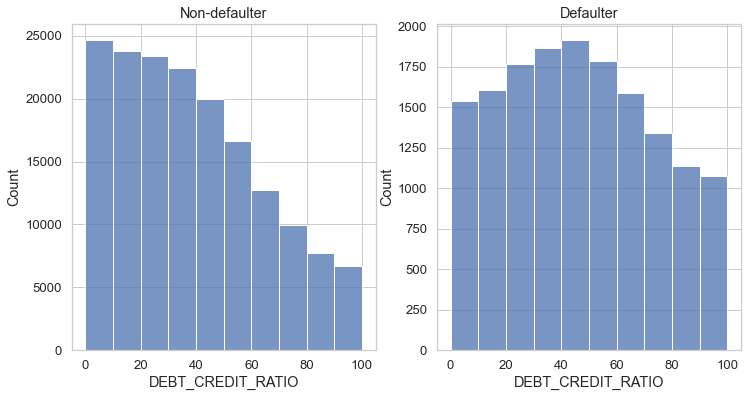

In [501]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(debt_credit_target[debt_credit_target["TARGET"] == 0]["DEBT_CREDIT_RATIO"].dropna(), ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(debt_credit_target[debt_credit_target["TARGET"] == 1]["DEBT_CREDIT_RATIO"].dropna(), ax= ax[1], bins=10).set(title = "Defaulter")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


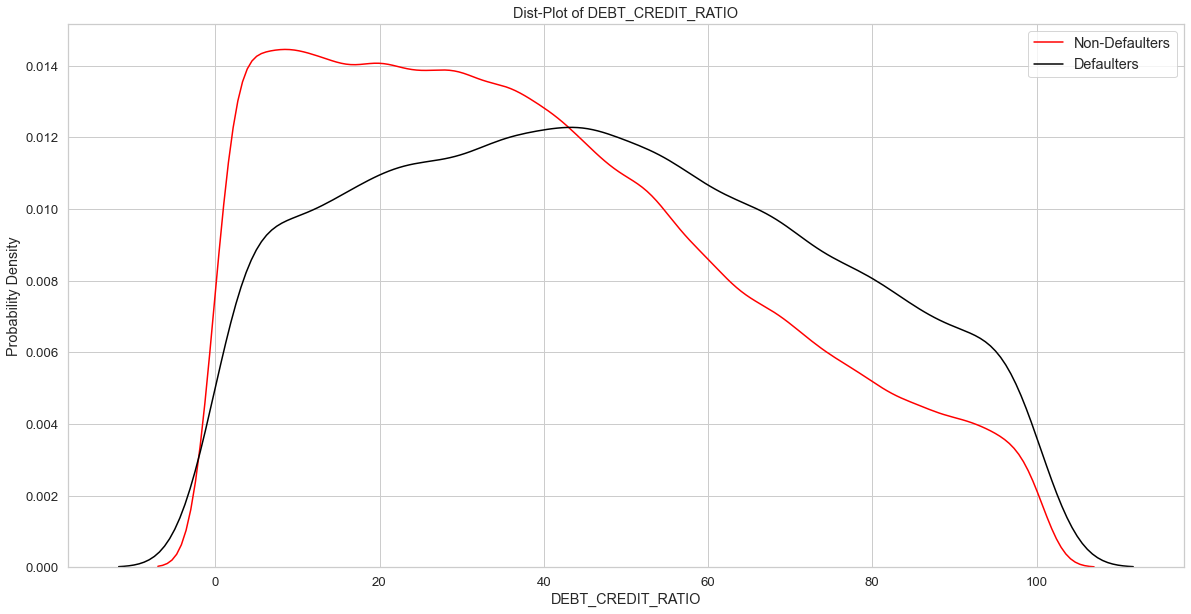

In [502]:
plot_continuous_variables(debt_credit_target,"DEBT_CREDIT_RATIO", plots = ['distplot'],figsize=(20,10))

In [503]:
data_with_sum_debt_pos_sign_all = data[data['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign_all[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = data[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

data = data.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
data = data.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


data['DEBT_CREDIT_RATIO'] = (data['TOTAL_CUSTOMER_DEBT']/data['TOTAL_CUSTOMER_CREDIT'])*100
data['DEBT_CREDIT_RATIO'] = data['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del data['TOTAL_CUSTOMER_DEBT'], data['TOTAL_CUSTOMER_CREDIT']

debt_credit = data.groupby(by = ['SK_ID_CURR'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit

,SK_ID_CURR,DEBT_CREDIT_RATIO
0,100001,41.055516
1,100002,28.412163
2,100003,NaN
3,100004,NaN
4,100005,86.499165
...,...,...
305806,456249,4.414652
305807,456250,72.317167
305808,456253,45.349318
305809,456254,NaN


In [504]:
# plt.figure(figsize=(8,6))
# sns.distplot(debt_credit.DEBT_CREDIT_RATIO)
# plt.show()

### A High value may be a red flag indicative of potential default

# Add Count Orverdue Counts

In [505]:
def overDue(df):
    name_flag = 'OVERDUE_FLAG'
    name = 'OVERDUE'
    
    def fun(x):
        days = abs(x)
        if days > 0:
            return 1
        else:
            return 0

    df[name_flag] = df['CREDIT_DAY_OVERDUE'].apply(fun)
    
    df[name] = df.groupby('SK_ID_CURR')[name_flag].transform('sum')
    
    #lets increase the groups by 1 to make the base group 1
    df[name] = df[name].apply(lambda x:x+1)
    
    #drop column
    df.drop([name_flag],axis=1, inplace=True)

#apply function
overDue(data)

In [506]:
data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DEBT_CREDIT_RATIO,OVERDUE
0,215354,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,4.761731,1
1,215354,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,4.761731,1
2,215354,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,4.761731,1
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,4.761731,1
4,215354,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,4.761731,1


In [507]:
data.shape

(1716428, 15)

In [508]:
# features = ['PAST_LOAN_COUNT','CREDIT_TYPE_COUNT','ACTIVE_LOANS_PERCENTAGE','CREDIT_ENDDATE_PERCENTAGE']

# #these features columns are same value by id so we can take the first row
# reduced_data = data.groupby('SK_ID_CURR').first()[features]

# reduced_data.reset_index(inplace=True)

# #set max values
# for feature in features:

#         #check if any missing values
#         has_na = data[feature].isna().values.any()
#         # print("has na {}".format(has_na))
#         assert not has_na, "{} has nan values.".format(feature)

#         max_val = np.percentile(data[feature], 99.99)
#         data[feature] =  data[feature].apply(lambda x:x if x < max_val else max_val)

In [509]:
final_dataset = data.merge(num_past_loan,
                                      how='left', 
                                      on='SK_ID_CURR')

final_dataset = final_dataset.merge(num_of_type,
                                      how='left', 
                                      on='SK_ID_CURR')
final_dataset = final_dataset.merge(atv_loans,
                                      how='left', 
                                      on='SK_ID_CURR')
# final_dataset = final_dataset.merge(grp_enddate,
#                                       how='left', 
#                                       on='SK_ID_CURR')
final_dataset = final_dataset.merge(debt_credit,
                                      how='left', 
                                      on='SK_ID_CURR')


In [510]:
final_dataset

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DEBT_CREDIT_RATIO_x,OVERDUE,PAST_LOAN_COUNT,CREDIT_TYPE_COUNT,ACTIVE_LOANS_PERCENTAGE,DEBT_CREDIT_RATIO_y
0,215354,5714462,Closed,currency 1,-497,0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455,4.761731
1,215354,5714463,Active,currency 1,-208,0,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,4.761731,1,11,3,54.545455,4.761731
2,215354,5714464,Active,currency 1,-203,0,NaN,0,464323.50,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455,4.761731
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.00,0.0,NaN,0.0,Credit card,4.761731,1,11,3,54.545455,4.761731
4,215354,5714466,Active,currency 1,-629,0,77674.5,0,2700000.00,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455,4.761731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,17.109940,1,3,2,100.000000,17.109940
1716424,100044,5057754,Closed,currency 1,-2648,0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,49.275710,1,11,2,54.545455,49.275710
1716425,100044,5057762,Closed,currency 1,-1809,0,NaN,0,15570.00,0.0,NaN,0.0,Consumer credit,49.275710,1,11,2,54.545455,49.275710
1716426,246829,5057770,Closed,currency 1,-1878,0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,18.936872,1,31,3,25.806452,18.936872


In [511]:
final_dataset = final_dataset.drop(columns = ['DEBT_CREDIT_RATIO_y'])

In [512]:
final_dataset = final_dataset.rename(columns = {'DEBT_CREDIT_RATIO_x': 'DEBT_CREDIT_RATIO'})

In [513]:
final_dataset

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DEBT_CREDIT_RATIO,OVERDUE,PAST_LOAN_COUNT,CREDIT_TYPE_COUNT,ACTIVE_LOANS_PERCENTAGE
0,215354,5714462,Closed,currency 1,-497,0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455
1,215354,5714463,Active,currency 1,-208,0,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,4.761731,1,11,3,54.545455
2,215354,5714464,Active,currency 1,-203,0,NaN,0,464323.50,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.00,0.0,NaN,0.0,Credit card,4.761731,1,11,3,54.545455
4,215354,5714466,Active,currency 1,-629,0,77674.5,0,2700000.00,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,17.109940,1,3,2,100.000000
1716424,100044,5057754,Closed,currency 1,-2648,0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,49.275710,1,11,2,54.545455
1716425,100044,5057762,Closed,currency 1,-1809,0,NaN,0,15570.00,0.0,NaN,0.0,Consumer credit,49.275710,1,11,2,54.545455
1716426,246829,5057770,Closed,currency 1,-1878,0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,18.936872,1,31,3,25.806452


# MERGE WITH BUREAU_BALANCE

In [514]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [515]:
def extract_mean(x):
    y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_') 
    return y

In [516]:
# apply formula to create bureau_balance dataframe grouped by SK_ID_BUREAU with mean values of all numerical columns
bureau_bal_mean = extract_mean(bureau_balance)

In [517]:
bureau_bal_mean.head()

,BUR_BAL_MEAN_SK_ID_BUREAU,BUR_BAL_MEAN_MONTHS_BALANCE
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [518]:
bureau_bal_mean = bureau_bal_mean.rename(columns = {'BUR_BAL_MEAN_SK_ID_BUREAU' : 'SK_ID_BUREAU'})

In [519]:
final_dataset = final_dataset.merge(bureau_bal_mean,  on = 'SK_ID_BUREAU', how = 'left')
final_dataset.drop('SK_ID_BUREAU', axis = 1, inplace = True) # we don't need this internal ID anymore

In [520]:
# final_dataset = final_dataset.drop(columns = ['BUR_BAL_MEAN_MONTHS_BALANCE_y'])
# final_dataset = final_dataset.rename(columns = {'BUR_BAL_MEAN_MONTHS_BALANCE_x': 'BUR_BAL_MEAN_MONTHS_BALANCE'})

In [521]:
final_dataset

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DEBT_CREDIT_RATIO,OVERDUE,PAST_LOAN_COUNT,CREDIT_TYPE_COUNT,ACTIVE_LOANS_PERCENTAGE,BUR_BAL_MEAN_MONTHS_BALANCE
0,215354,Closed,currency 1,-497,0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455,NaN
1,215354,Active,currency 1,-208,0,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,4.761731,1,11,3,54.545455,NaN
2,215354,Active,currency 1,-203,0,NaN,0,464323.50,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455,NaN
3,215354,Active,currency 1,-203,0,NaN,0,90000.00,0.0,NaN,0.0,Credit card,4.761731,1,11,3,54.545455,NaN
4,215354,Active,currency 1,-629,0,77674.5,0,2700000.00,0.0,NaN,0.0,Consumer credit,4.761731,1,11,3,54.545455,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,Active,currency 1,-44,0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,17.109940,1,3,2,100.000000,NaN
1716424,100044,Closed,currency 1,-2648,0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,49.275710,1,11,2,54.545455,NaN
1716425,100044,Closed,currency 1,-1809,0,NaN,0,15570.00,0.0,NaN,0.0,Consumer credit,49.275710,1,11,2,54.545455,NaN
1716426,246829,Closed,currency 1,-1878,0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,18.936872,1,31,3,25.806452,NaN


In [522]:
def extract_mean_bur(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('BUR_MEAN_') # note that we have changed the ID to group by and the prefix to add
    return y

In [523]:
final_data_mean_values = extract_mean_bur(final_dataset)
final_data_mean_values = final_data_mean_values.rename(columns = {'BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})

In [524]:
final_data_mean_values

,SK_ID_CURR,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_CREDIT_DAY_OVERDUE,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_CNT_CREDIT_PROLONG,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_DEBT_CREDIT_RATIO,BUR_MEAN_OVERDUE,BUR_MEAN_PAST_LOAN_COUNT,BUR_MEAN_CREDIT_TYPE_COUNT,BUR_MEAN_ACTIVE_LOANS_PERCENTAGE,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
0,100001,-735.000000,0.0,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,41.055516,1.0,7.0,1.0,42.857143,-11.785714
1,100002,-874.000000,0.0,1681.029,0.000000,1.081319e+05,30722.625000,7997.14125,0.0,28.412163,1.0,8.0,2.0,25.000000,-21.875000
2,100003,-1400.750000,0.0,0.000,0.000000,2.543501e+05,0.000000,202500.00000,0.0,NaN,1.0,4.0,2.0,25.000000,NaN
3,100004,-867.000000,0.0,0.000,0.000000,9.451890e+04,0.000000,0.00000,0.0,NaN,1.0,2.0,1.0,0.000000,NaN
4,100005,-190.666667,0.0,0.000,0.000000,2.190420e+05,189469.500000,0.00000,0.0,86.499165,1.0,3.0,2.0,66.666667,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-1667.076923,0.0,6147.000,0.000000,2.841430e+05,12543.923077,0.00000,0.0,4.414652,1.0,13.0,3.0,15.384615,NaN
305807,456250,-862.000000,0.0,0.000,0.000000,1.028820e+06,744013.365000,19422.79500,0.0,72.317167,1.0,3.0,2.0,66.666667,-14.000000
305808,456253,-867.500000,0.0,NaN,0.000000,9.900000e+05,448958.250000,0.00000,0.0,45.349318,1.0,4.0,2.0,50.000000,-14.125000
305809,456254,-1104.000000,0.0,NaN,0.000000,4.500000e+04,0.000000,NaN,0.0,NaN,1.0,1.0,1.0,0.000000,-18.000000


In [525]:
# final_data_mean_values.to_csv('bureau_balance_merge_bureau_2.csv', index = False)
# print('done')